In [471]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.model_selection import train_test_split
import re

In [472]:
df1 = pd.read_csv("houses_edited.csv")
df1.head()

,index,title,final_price,list_price,bedrooms,bathrooms,sqft,parking,description,mls,...,full_address,lat,long,city_district,mean_district_income,district_code,final_price_transformed,final_price_log,bedrooms_ag,bedrooms_bg
0,0,"1303 - 38 Grenville St, Toronto (C4461599) | Z...",855000,870000,2 + 1 beds,2,850.0,1,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,...,"38 Grenville St, Toronto , Ontario, Canada",43.661896,-79.385748,Bay Street Corridor,56526,76,2.391687,13.658857,2,1
1,1,"2 Cabot Crt, Toronto (W4502992) | Zoocasa",885000,898000,3 beds,2,NaN,6,Fantastic Opportunity To Live Within The Histo...,W4502992,...,"2 Cabot Crt, Toronto , Ontario, Canada",43.646982,-79.530356,Islington-City Centre West,52787,14,2.391803,13.693343,3,0
2,2,"1504 - 30 Roehampton Ave, Toronto (C4511330) |...",550000,549900,1 beds,1,550.0,0,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,...,"30 Roehampton Ave, Toronto , Ontario, Canada",43.708472,-79.397498,Mount Pleasant West,57039,104,2.390053,13.217674,1,0
3,3,"514 - 65 East Liberty St, Toronto (C4515763) |...",665000,600000,1 + 1 beds,1,650.0,1,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,...,"65 East Liberty St, Toronto , Ontario, Canada",43.638399,-79.414448,Niagara,70623,82,2.390793,13.407542,1,1
4,4,"61 Twelfth St, Toronto (W4519375) | Zoocasa",825513,839000,2 beds,2,NaN,1,Location! Location! Location. Your Cottage In ...,W4519375,...,"61 Twelfth St, Toronto , Ontario, Canada",43.597096,-79.509612,New Toronto,44101,18,2.391568,13.623760,2,0


In [473]:
df1.shape

(15234, 22)

In [474]:
df1.groupby('type')['type'].agg('count')

type
Att/Row/Twnhouse       467
Co-Op Apt               24
Co-Ownership Apt        27
Comm Element Condo     181
Condo Apt             7572
Condo Townhouse       1062
Detached              4361
Link                    27
Plex                    70
Semi-Detached         1435
Store W/Apt/Offc         8
Name: type, dtype: int64

In [475]:
df2 = df1.drop(['final_price_log','final_price_transformed','title','parking','lat','long','district_code','mean_district_income','district_code','full_link','full_address','mls','description'],axis = 'columns')
df2.head()

,index,final_price,list_price,bedrooms,bathrooms,sqft,type,city_district,bedrooms_ag,bedrooms_bg
0,0,855000,870000,2 + 1 beds,2,850.0,Condo Apt,Bay Street Corridor,2,1
1,1,885000,898000,3 beds,2,NaN,Semi-Detached,Islington-City Centre West,3,0
2,2,550000,549900,1 beds,1,550.0,Condo Apt,Mount Pleasant West,1,0
3,3,665000,600000,1 + 1 beds,1,650.0,Condo Apt,Niagara,1,1
4,4,825513,839000,2 beds,2,NaN,Detached,New Toronto,2,0


In [476]:
df2.isnull().sum()

index               0
final_price         0
list_price          0
bedrooms            0
bathrooms           0
sqft             4521
type                0
city_district       0
bedrooms_ag         0
bedrooms_bg         0
dtype: int64

In [477]:
df3 = df2.dropna()
df3.isnull().sum()

index            0
final_price      0
list_price       0
bedrooms         0
bathrooms        0
sqft             0
type             0
city_district    0
bedrooms_ag      0
bedrooms_bg      0
dtype: int64

In [478]:
df3.shape

(10713, 10)

In [479]:
df3['bedrooms'].unique()

array(['2 + 1 beds', '1 beds', '1 + 1 beds', '0 beds', '4 beds', '3 beds',
       '2 beds', '4 + 2 beds', '3 + 1 beds', '3 + 2 beds', '4 + 3 beds',
       '4 + 1 beds', '5 beds', '2 + 2 beds', '5 + 2 beds', '6 + 2 beds',
       '6 beds', '1 + 2 beds', '0 + 1 beds', '5 + 1 beds', '5 + 3 beds',
       '2 + 3 beds', '6 + 1 beds', '8 + 3 beds', '3 + 3 beds',
       '6 + 3 beds', '4 + 4 beds', '7 + 3 beds', '7 + 1 beds',
       '9 + 3 beds', '9 beds', '9 + 2 beds', '7 beds', '4 + 6 beds',
       '5 + 6 beds', '8 + 4 beds', '2 + 4 beds'], dtype=object)

In [480]:
df3['bathrooms'].unique()

array([ 2,  1,  5,  4,  3,  6,  7,  8,  9, 14, 10], dtype=int64)

In [481]:
df3['total_bedrooms'] = df3['bedrooms_ag'] + df3['bedrooms_bg']

C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [482]:
df3.head(10)

,index,final_price,list_price,bedrooms,bathrooms,sqft,type,city_district,bedrooms_ag,bedrooms_bg,total_bedrooms
0,0,855000,870000,2 + 1 beds,2,850.0,Condo Apt,Bay Street Corridor,2,1,3
2,2,550000,549900,1 beds,1,550.0,Condo Apt,Mount Pleasant West,1,0,1
3,3,665000,600000,1 + 1 beds,1,650.0,Condo Apt,Niagara,1,1,2
5,5,368000,289000,0 beds,1,250.0,Condo Apt,New Toronto,0,0,0
6,6,2700000,2798000,4 beds,5,2750.0,Detached,Lawrence Park South,4,0,4
7,7,200000,199000,3 beds,2,1100.0,Condo Townhouse,Glenfield-Jane Heights,3,0,3
8,8,975000,954900,2 beds,2,1300.0,Plex,Mount Pleasant East,2,0,2
9,9,269900,269900,1 beds,1,650.0,Condo Apt,Malvern,1,0,1
11,11,1530000,1399900,4 + 2 beds,5,3250.0,Detached,Wexford/Maryvale,4,2,6
12,12,2250000,1990000,3 + 1 beds,4,2750.0,Semi-Detached,Cabbagetown-South St. James Town,3,1,4


In [483]:
df3['total_bedrooms'].unique()

array([ 3,  1,  2,  0,  4,  6,  5,  7,  8, 11,  9, 10, 12], dtype=int64)

In [484]:
df3[df3.total_bedrooms == 13]

,index,final_price,list_price,bedrooms,bathrooms,sqft,type,city_district,bedrooms_ag,bedrooms_bg,total_bedrooms


In [485]:
df3.sqft.unique()

array([ 850.,  550.,  650.,  250., 2750., 1100., 1300., 3250., 1750.,
        750.,  900., 2374.,  950., 2250., 1900., 2124., 1500., 4250.,
       1700., 4374.,  800., 2874., 3374., 2624.,  600., 3124., 1000.,
       1200.])

In [486]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [487]:
df3[~df3['sqft'].apply(is_float)].head(10)

,index,final_price,list_price,bedrooms,bathrooms,sqft,type,city_district,bedrooms_ag,bedrooms_bg,total_bedrooms


In [488]:
df3.loc[0]

index                               0
final_price                    855000
list_price                     870000
bedrooms                   2 + 1 beds
bathrooms                           2
sqft                              850
type                        Condo Apt
city_district     Bay Street Corridor
bedrooms_ag                         2
bedrooms_bg                         1
total_bedrooms                      3
Name: 0, dtype: object

In [489]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['final_price']/df4['sqft']
df4.head()

,index,final_price,list_price,bedrooms,bathrooms,sqft,type,city_district,bedrooms_ag,bedrooms_bg,total_bedrooms,price_per_sqft
0,0,855000,870000,2 + 1 beds,2,850.0,Condo Apt,Bay Street Corridor,2,1,3,1005.882353
2,2,550000,549900,1 beds,1,550.0,Condo Apt,Mount Pleasant West,1,0,1,1000.000000
3,3,665000,600000,1 + 1 beds,1,650.0,Condo Apt,Niagara,1,1,2,1023.076923
5,5,368000,289000,0 beds,1,250.0,Condo Apt,New Toronto,0,0,0,1472.000000
6,6,2700000,2798000,4 beds,5,2750.0,Detached,Lawrence Park South,4,0,4,981.818182


In [490]:
len(df4.city_district.unique())

140

In [491]:
df4.location = df4.city_district.apply(lambda x: x.strip())
location_stats = df4.groupby("city_district")['city_district'].agg('count').sort_values(ascending = False)
location_stats

C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


city_district
Waterfront Communities-The Island      1145
Niagara                                 525
Mimico (includes Humber Bay Shores)     470
Willowdale East                         425
Church-Yonge Corridor                   380
Islington-City Centre West              370
Bay Street Corridor                     276
Mount Pleasant West                     226
Bayview Village                         195
Moss Park                               181
Malvern                                 175
L'Amoreaux                              160
Annex                                   158
High Park-Swansea                       139
Banbury-Don Mills                       137
Henry Farm                              135
Agincourt South-Malvern West            134
Woburn                                  121
Dovercourt-Wallace Emerson-Junction     121
Little Portugal                         121
Willowdale West                         114
South Riverdale                         112
Bendale           

In [492]:
len(location_stats[location_stats <= 10])

10

In [493]:
less_than_ten = location_stats[location_stats <= 10]
less_than_ten

city_district
Ionview                         10
Woodbine-Lumsden                 9
Blake-Jones                      8
Beechborough-Greenbrook          8
Playter Estates-Danforth         8
Rexdale-Kipling                  7
North Riverdale                  7
Thistletown-Beaumond Heights     7
Caledonia-Fairbank               5
Rustic                           4
Name: city_district, dtype: int64

In [494]:
len(df4.location.unique())

140

In [495]:
df4.city_district = df4.city_district.apply(lambda x: 'Other' if x in less_than_ten else x)
len(df4.city_district.unique())

131

In [496]:
df4.head(10)

,index,final_price,list_price,bedrooms,bathrooms,sqft,type,city_district,bedrooms_ag,bedrooms_bg,total_bedrooms,price_per_sqft
0,0,855000,870000,2 + 1 beds,2,850.0,Condo Apt,Bay Street Corridor,2,1,3,1005.882353
2,2,550000,549900,1 beds,1,550.0,Condo Apt,Mount Pleasant West,1,0,1,1000.000000
3,3,665000,600000,1 + 1 beds,1,650.0,Condo Apt,Niagara,1,1,2,1023.076923
5,5,368000,289000,0 beds,1,250.0,Condo Apt,New Toronto,0,0,0,1472.000000
6,6,2700000,2798000,4 beds,5,2750.0,Detached,Lawrence Park South,4,0,4,981.818182
7,7,200000,199000,3 beds,2,1100.0,Condo Townhouse,Glenfield-Jane Heights,3,0,3,181.818182
8,8,975000,954900,2 beds,2,1300.0,Plex,Mount Pleasant East,2,0,2,750.000000
9,9,269900,269900,1 beds,1,650.0,Condo Apt,Malvern,1,0,1,415.230769
11,11,1530000,1399900,4 + 2 beds,5,3250.0,Detached,Wexford/Maryvale,4,2,6,470.769231
12,12,2250000,1990000,3 + 1 beds,4,2750.0,Semi-Detached,Cabbagetown-South St. James Town,3,1,4,818.181818


In [497]:
df4[df4.sqft/df4.total_bedrooms<160].head()

,index,final_price,list_price,bedrooms,bathrooms,sqft,type,city_district,bedrooms_ag,bedrooms_bg,total_bedrooms,price_per_sqft
2034,3088,691100,699900,3 + 3 beds,2,900.0,Detached,Birchcliffe-Cliffside,3,3,6,767.888889
3666,5483,552500,549000,1 + 1 beds,1,250.0,Condo Apt,Waterfront Communities-The Island,1,1,2,2210.000000
4538,6673,535000,539000,1 + 1 beds,1,250.0,Condo Apt,Waterfront Communities-The Island,1,1,2,2140.000000
11455,13698,500000,499000,1 + 1 beds,1,250.0,Condo Apt,Niagara,1,1,2,2000.000000
11626,13871,455000,459000,1 + 1 beds,1,250.0,Condo Apt,Mimico (includes Humber Bay Shores),1,1,2,1820.000000


In [498]:
df4.shape

(10713, 12)

In [499]:
df5 = df4[~(df4.sqft/df4.total_bedrooms<160)]
df5.shape

(10704, 12)

In [500]:
df5.price_per_sqft.describe()

count    10704.000000
mean       752.282753
std        323.423726
min        109.000000
25%        520.981781
50%        730.839161
75%        909.090909
max       2500.000000
Name: price_per_sqft, dtype: float64

In [501]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('city_district'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.shape

(8293, 12)

In [502]:
df6.price_per_sqft.describe()

count    8293.000000
mean      735.007110
std       231.735468
min       215.789474
25%       557.142857
50%       754.545455
75%       905.333333
max      1505.335366
Name: price_per_sqft, dtype: float64

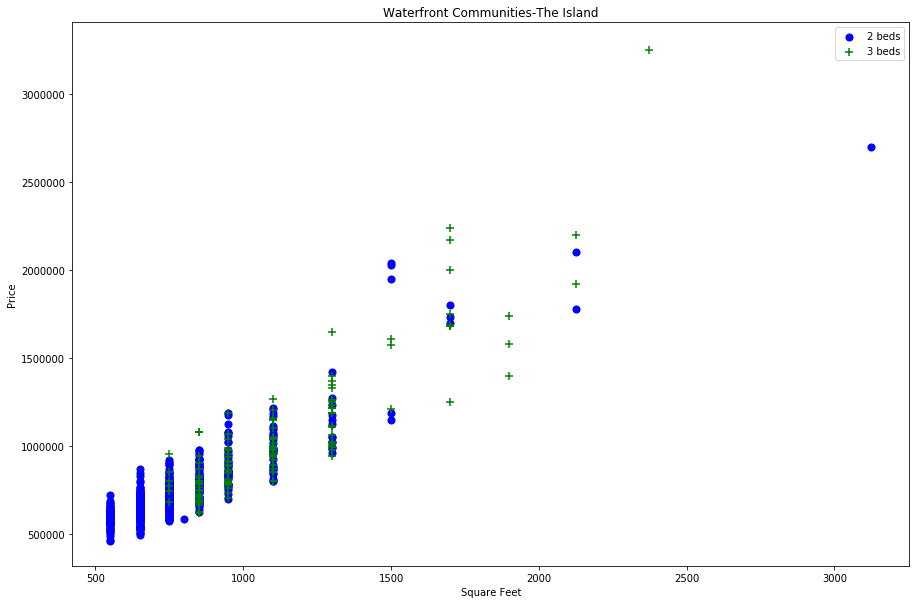

In [503]:
def plot_scatter_chart(df,city_district):
    total_bedrooms_2 = df[(df.city_district == city_district) & (df.total_bedrooms == 2)]
    total_bedrooms_3 = df[(df.city_district == city_district) & (df.total_bedrooms == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(total_bedrooms_2.sqft,total_bedrooms_2.final_price,color = 'blue',label = '2 beds', s = 50)
    plt.scatter(total_bedrooms_3.sqft,total_bedrooms_3.final_price,marker = '+',color = 'green',label = '3 beds', s = 50)
    plt.xlabel("Square Feet")
    plt.ylabel("Price")
    plt.title(city_district)
    plt.legend()
plot_scatter_chart(df6,"Waterfront Communities-The Island")

In [504]:
def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for city_district, city_district_df in df.groupby('city_district'):
        total_bedrooms_stats = {}
        for total_bedrooms, total_bedrooms_df in city_district_df.groupby('total_bedrooms'):
            total_bedrooms_stats[total_bedrooms] = {
                'mean': np.mean(total_bedrooms_df.price_per_sqft),
                'std': np.std(total_bedrooms_df.price_per_sqft),
                'count': total_bedrooms_df.shape[0]
            }
        for total_bedrooms, total_bedrooms_df in city_district_df.groupby('total_bedrooms'):
            stats = total_bedrooms_stats.get(total_bedrooms-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, total_bedrooms_df[total_bedrooms_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bedroom_outliers(df6)
df7.shape

(5040, 12)

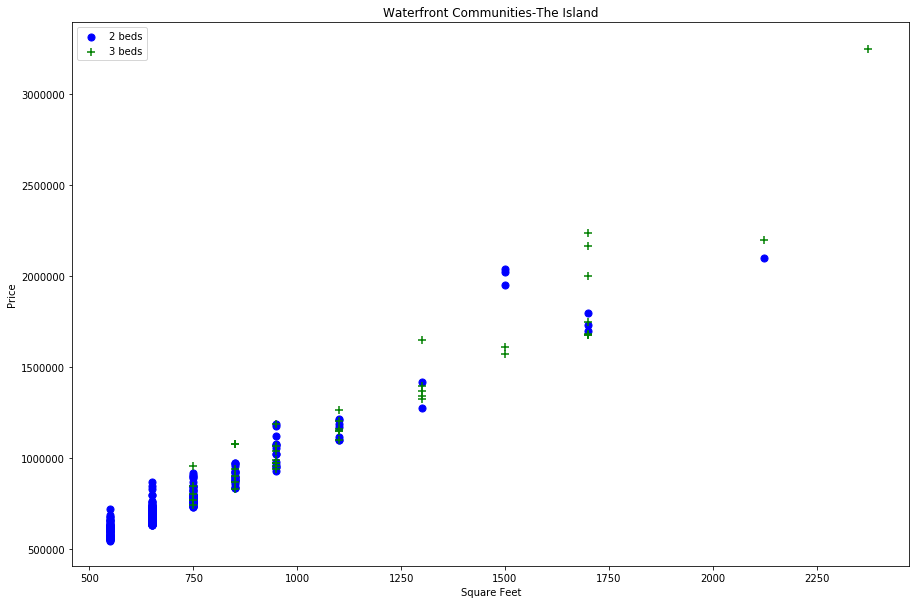

In [505]:
def plot_scatter_chart(df,city_district):
    total_bedrooms_2 = df[(df.city_district == city_district) & (df.total_bedrooms == 2)]
    total_bedrooms_3 = df[(df.city_district == city_district) & (df.total_bedrooms == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(total_bedrooms_2.sqft,total_bedrooms_2.final_price,color = 'blue',label = '2 beds', s = 50)
    plt.scatter(total_bedrooms_3.sqft,total_bedrooms_3.final_price,marker = '+',color = 'green',label = '3 beds', s = 50)
    plt.xlabel("Square Feet")
    plt.ylabel("Price")
    plt.title(city_district)
    plt.legend()
plot_scatter_chart(df7,"Waterfront Communities-The Island")

Text(0, 0.5, 'Count')

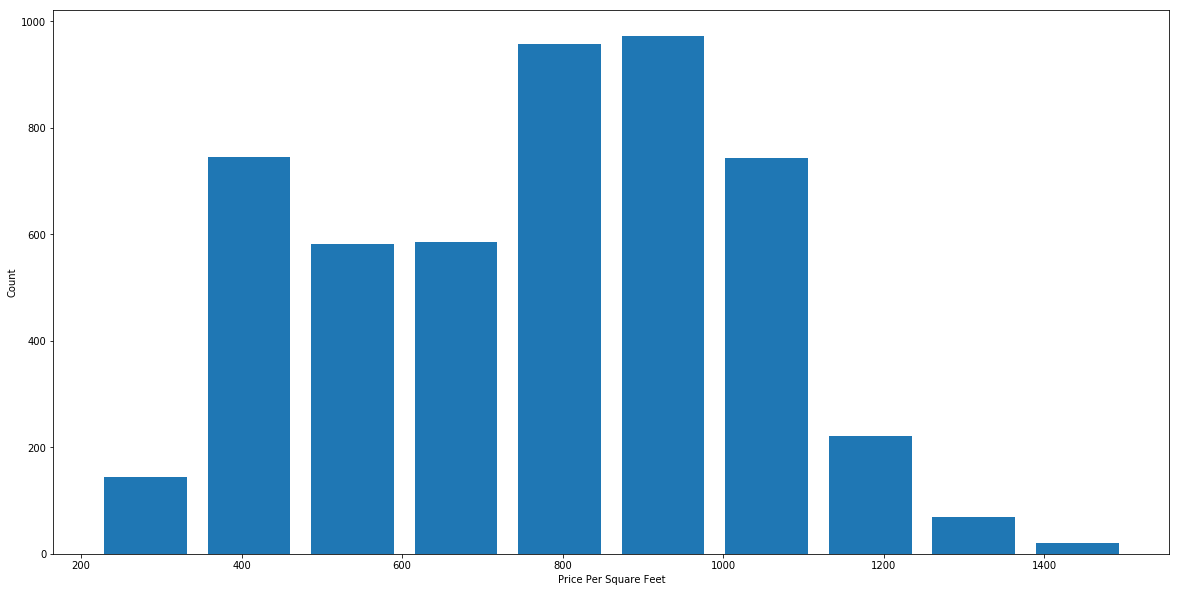

In [506]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df7.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [507]:
df7.bathrooms.unique()

array([ 3,  2,  5,  4,  1,  6, 14,  7,  8,  9, 10], dtype=int64)

In [508]:
df7[df7.bathrooms > 10]

,index,final_price,list_price,bedrooms,bathrooms,sqft,type,city_district,bedrooms_ag,bedrooms_bg,total_bedrooms,price_per_sqft
208,9479,3380000,2999000,9 + 2 beds,14,4250.0,Detached,Annex,9,2,11,795.294118


Text(0, 0.5, 'Count')

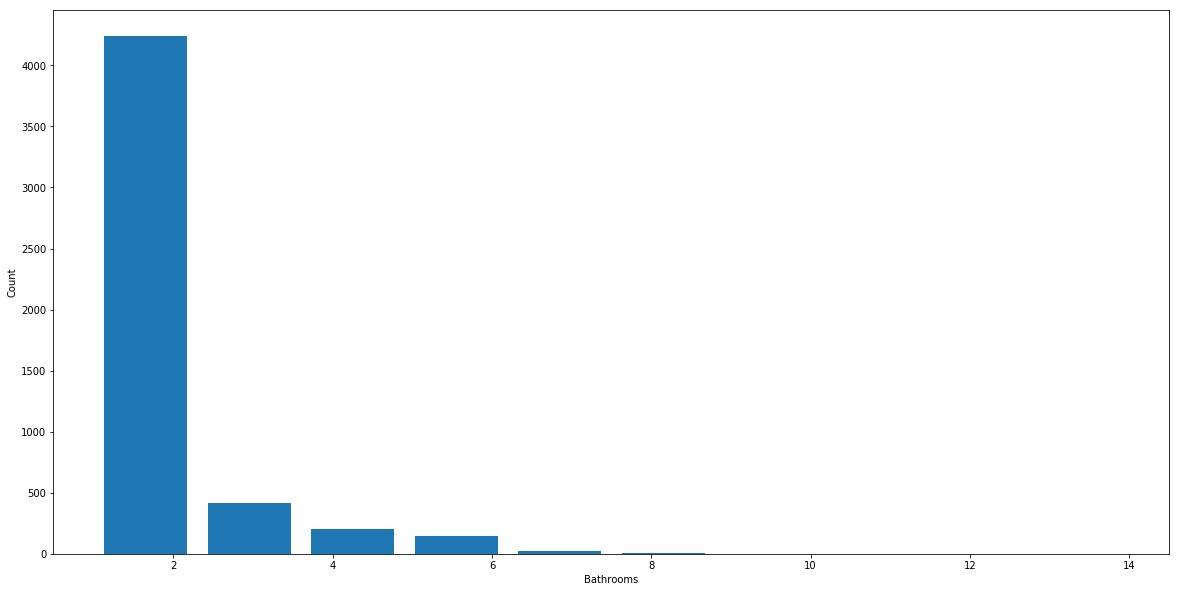

In [509]:
plt.hist(df7.bathrooms, rwidth = 0.8)
plt.xlabel("Bathrooms")
plt.ylabel("Count")

In [510]:
df7[df7.bathrooms > df7.total_bedrooms+1]

,index,final_price,list_price,bedrooms,bathrooms,sqft,type,city_district,bedrooms_ag,bedrooms_bg,total_bedrooms,price_per_sqft
208,9479,3380000,2999000,9 + 2 beds,14,4250.0,Detached,Annex,9,2,11,795.294118
804,13886,2610000,2790000,4 + 1 beds,7,4250.0,Detached,Bayview Woods-Steeles,4,1,5,614.117647
2047,11666,2600000,2688800,4 + 1 beds,7,4250.0,Detached,Englemount-Lawrence,4,1,5,611.764706
3382,16705,4200000,4295000,4 + 1 beds,7,4250.0,Detached,Lawrence Park South,4,1,5,988.235294
3407,12628,3500000,2995000,4 + 1 beds,7,3250.0,Detached,Leaside-Bennington,4,1,5,1076.923077
7875,1015,3100000,2500000,4 + 1 beds,7,4250.0,Detached,Willowdale West,4,1,5,729.411765
7938,14069,3000000,3288000,4 + 1 beds,7,4250.0,Detached,Willowdale West,4,1,5,705.882353


In [511]:
df8 = df7[df7.bathrooms < df7.total_bedrooms+1]
df8.shape

(4836, 12)

In [512]:
df9 = df8.drop(['bedrooms_ag','bedrooms_bg','bedrooms','index'],axis='columns')
df9.head()

,final_price,list_price,bathrooms,sqft,type,city_district,total_bedrooms,price_per_sqft
0,634000,639000,3,1300.0,Condo Townhouse,Agincourt North,3,487.692308
1,453000,448000,2,950.0,Condo Apt,Agincourt North,2,476.842105
3,798000,768000,3,1750.0,Detached,Agincourt North,5,456.000000
6,890000,789000,5,1750.0,Detached,Agincourt North,6,508.571429
7,818000,838000,4,1750.0,Detached,Agincourt North,5,467.428571


In [513]:
dummies = pd.get_dummies(df9.city_district)
dummies.head(3)

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [514]:
df10 = pd.concat([df9,dummies.drop('Other', axis = 'columns')], axis = "columns")
df10.head(3)

,final_price,list_price,bathrooms,sqft,type,city_district,total_bedrooms,price_per_sqft,Agincourt North,Agincourt South-Malvern West,...,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,634000,639000,3,1300.0,Condo Townhouse,Agincourt North,3,487.692308,1,0,...,0,0,0,0,0,0,0,0,0,0
1,453000,448000,2,950.0,Condo Apt,Agincourt North,2,476.842105,1,0,...,0,0,0,0,0,0,0,0,0,0
3,798000,768000,3,1750.0,Detached,Agincourt North,5,456.000000,1,0,...,0,0,0,0,0,0,0,0,0,0


In [515]:
df11 = df10.drop('city_district',axis = 'columns')
df11.head(2)

,final_price,list_price,bathrooms,sqft,type,total_bedrooms,price_per_sqft,Agincourt North,Agincourt South-Malvern West,Alderwood,...,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,634000,639000,3,1300.0,Condo Townhouse,3,487.692308,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,453000,448000,2,950.0,Condo Apt,2,476.842105,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [516]:
df11.shape

(4836, 137)

In [517]:
X = df11.drop('final_price',axis = 'columns')
X.head()

,list_price,bathrooms,sqft,type,total_bedrooms,price_per_sqft,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,639000,3,1300.0,Condo Townhouse,3,487.692308,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,448000,2,950.0,Condo Apt,2,476.842105,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,768000,3,1750.0,Detached,5,456.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,789000,5,1750.0,Detached,6,508.571429,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,838000,4,1750.0,Detached,5,467.428571,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [518]:
X = X.drop('type',axis = 'columns')

In [519]:
X

,list_price,bathrooms,sqft,total_bedrooms,price_per_sqft,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,...,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,639000,3,1300.0,3,487.692308,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,448000,2,950.0,2,476.842105,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,768000,3,1750.0,5,456.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,789000,5,1750.0,6,508.571429,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,838000,4,1750.0,5,467.428571,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,829000,5,1750.0,7,457.142857,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,588000,3,1300.0,5,461.538462,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,439000,2,950.0,2,457.894737,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,408800,2,850.0,2,476.470588,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,429999,2,950.0,2,458.947368,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [520]:
y = df11.final_price
y.head()

0    634000
1    453000
3    798000
6    890000
7    818000
Name: final_price, dtype: int64

In [521]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 10)

In [522]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression().fit(X_train,y_train)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9903583570615362

In [523]:
X_train

,list_price,bathrooms,sqft,total_bedrooms,price_per_sqft,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,...,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
5720,949000,2,1100.0,2,844.545455,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540,609000,1,650.0,1,923.076923,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7477,605000,3,1100.0,3,533.636364,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3862,549900,1,650.0,2,835.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5653,728000,1,950.0,1,752.631579,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
682,415000,1,550.0,2,819.796364,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2381,998900,2,1300.0,5,978.461538,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1649,1377000,2,2250.0,4,560.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1017,1299900,4,1750.0,4,691.428571,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1477,489900,2,850.0,2,556.470588,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [524]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.98965225, 0.98986635, 0.9887956 , 0.98748847, 0.98943141])

In [542]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase t

,model,best_score,best_params
0,linear_regression,0.989047,{'normalize': True}
1,lasso,0.989026,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.984828,"{'criterion': 'mse', 'splitter': 'best'}"


In [525]:
X.columns

Index(['list_price', 'bathrooms', 'sqft', 'total_bedrooms', 'price_per_sqft',
       'Agincourt North', 'Agincourt South-Malvern West', 'Alderwood', 'Annex',
       'Banbury-Don Mills',
       ...
       'Willowdale East', 'Willowdale West',
       'Willowridge-Martingrove-Richview', 'Woburn', 'Woodbine Corridor',
       'Wychwood', 'Yonge-Eglinton', 'Yonge-St.Clair',
       'York University Heights', 'Yorkdale-Glen Park'],
      dtype='object', length=135)

In [526]:
np.where(X.columns=="Agincourt North")[0][0]

5

In [527]:
def predict_price(location,sqft,bath,beds):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = beds
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0] + 1000000

In [539]:
predict_price('Niagara',1500,2,2)

867596.154843465

In [540]:
predict_price('Centennial Scarborough',1500,3,3)

815390.5984282542

In [541]:
predict_price('Annex',900,2,1)

852176.3417888238

In [530]:
import pickle
with open('Toronto Home Prices.pickle','wb') as f:
    pickle.dump(lr_clf, f)

In [531]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))